# Bibliothèques

In [1]:
#Importation des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

# Lecture du fichier

In [2]:
#Ouverture du fichier 
df = pd.read_csv("ETL_csv.csv")
df

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
1008208,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
1008209,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
1008210,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
1008211,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


# Informations

In [3]:
#Informations générales du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008213 entries, 0 to 1008212
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   transactionId   1008213 non-null  int64  
 1   step            1008213 non-null  int64  
 2   type            1008213 non-null  object 
 3   amount          1008213 non-null  float64
 4   nameOrig        1008213 non-null  object 
 5   oldbalanceOrg   1008213 non-null  float64
 6   newbalanceOrig  1008213 non-null  float64
 7   nameDest        1008213 non-null  object 
 8   oldbalanceDest  1008213 non-null  float64
 9   newbalanceDest  1008213 non-null  float64
 10  isFraud         1008213 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 84.6+ MB


Pas de valeurs manquantes

Deux types de valeurs : catégorielles et numériques

In [4]:
#Description des valeurs numériques du dataset
df.describe()

,transactionId,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.008213e+06,1.008213e+06,1.008213e+06,1.008213e+06,1.008213e+06,1.008213e+06,1.008213e+06,1.008213e+06
mean,5.307933e+05,2.796394e+01,1.704465e+05,8.864969e+05,8.956942e+05,9.828208e+05,1.126970e+06,8.146096e-03
std,4.836847e+05,3.862915e+01,3.540274e+05,2.996935e+06,3.021933e+06,2.316250e+06,2.442277e+06,8.988740e-02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.520530e+05,1.400000e+01,1.288616e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.041060e+05,2.000000e+01,8.073570e+04,1.660104e+04,0.000000e+00,1.314209e+05,2.288872e+05,0.000000e+00
75%,7.561590e+05,3.800000e+01,2.187655e+05,1.461460e+05,1.766663e+05,9.207872e+05,1.167308e+06,0.000000e+00
max,6.362619e+06,7.430000e+02,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000e+00


Possibilité de Outliers notamment sur les montants

In [5]:
# Vérification des doublons
df.duplicated().sum()

np.int64(0)

Pas de doublons numériques

In [6]:
# Compter les occurrences de chaque identifiant
count_nameOrig = df['nameOrig'].value_counts()

# Filtrer pour trouver les identifiants qui se répètent (plus de 1 occurrence)
duplicates = count_nameOrig[count_nameOrig > 1]

# Afficher les identifiants bancaires qui sont répétés
print("Les identifiants bancaires de l'origine qui sont répétés sont :")
print(duplicates)

Les identifiants bancaires de l'origine qui sont répétés sont :
nameOrig
C869403888     2
C24957224      2
C1918750088    2
C799020476     2
C906270424     2
              ..
C90584452      2
C1709042215    2
C1420432689    2
C1959089715    2
C176268154     2
Name: count, Length: 246, dtype: int64


Il existe des doublons sur les noms de l'origine

In [7]:
# Compter les occurrences de chaque identifiant
count_nameDest = df['nameDest'].value_counts()

# Filtrer pour trouver les identifiants qui se répètent (plus de 1 occurrence)
duplicates = count_nameDest[count_nameDest > 1]

# Afficher les identifiants bancaires qui sont répétés
print("Les identifiants bancaires des destinataires qui sont répétés sont :")
print(duplicates)

Les identifiants bancaires des destinataires qui sont répétés sont :
nameDest
C985934102     96
C1286084959    96
C248609774     88
C1590550415    88
C665576141     87
               ..
C1837027614     2
C14138104       2
C1669818195     2
C686334805      2
C1286367743     2
Name: count, Length: 76281, dtype: int64


Il existe des doublons sur les nom des destinataires

# Distribution des features

In [8]:
# #Distribution des variables numériques
# numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# #Histogrammes
# df[numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
# plt.suptitle('Distribution des variables numériques')
# plt.show()

# #Boxplots pour vérifier les valeurs aberrantes
# for feature in numeric_features:
#     plt.figure(figsize=(6, 4))
#     sns.boxplot(x=df[feature])
#     plt.title(f'Boxplot de {feature}')
#     plt.show()

# #Analyse des corrélations
# corr_matrix = df[numeric_features].corr()

# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title("Matrice de corrélation entre les variables numériques")
# plt.show()

# #Analyse des variables catégorielles (si elles existent)
# categorical_features = df.select_dtypes(include=['object']).columns

# for feature in categorical_features:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(x=feature, data=df, palette='Set2')
#     plt.title(f'Distribution de {feature}')
#     plt.show()

# #Analyse temporelle (si applicable)
# if 'Time' in df.columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df['Time'], kde=True, color='purple')
#     plt.title("Distribution des transactions par période")
#     plt.xlabel("Temps (en secondes)")
#     plt.ylabel("Fréquence")
#     plt.show()

On remarque plusieurs éléments : 

- Une distribution importante de "petites" transaction (par rapport aux "grandes" transaction)
- 5 types de transactions possibles : Payment, Transfer, Cash_out, Debit, Cash_in
- Des montants qui comportent des "outliers" et qu'il faudra certainement standardiser (mettre à l'échelle l'ensemble des valeurs car elles ne sont pas uniformes.)

# Distribution des classes de la target

In [9]:
#Distribution des classes 
df['isFraud'].value_counts()
df['isFraud'].value_counts(normalize = True)

isFraud
0    0.991854
1    0.008146
Name: proportion, dtype: float64

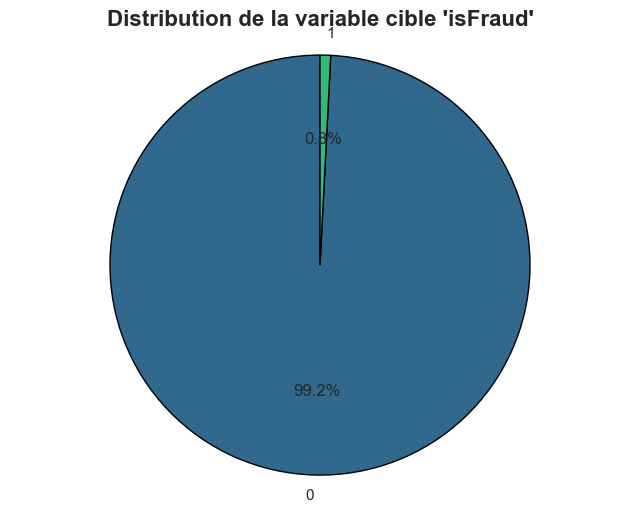

In [10]:
# Compter les occurrences des valeurs de la variable cible
counts = df['isFraud'].value_counts()

# Utilisation de seaborn pour un style plus moderne et esthétique
sns.set(style="whitegrid")

# Créer un graphique camembert
plt.figure(figsize=(8, 6))  # Taille du graphique
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(counts)), startangle=90, wedgeprops={'edgecolor': 'black'})

# Ajouter un titre avec un style esthétique
plt.title("Distribution de la variable cible 'isFraud'", fontsize=16, fontweight='bold')

# Afficher le graphique
plt.axis('equal')  # Pour que le graphique soit un cercle parfait
plt.show()

Classes déséquilibrées : Les transacations frauduleuses représentent moins de 1% des transactions

# Relation entre les features et la target

<Axes: xlabel='isFraud', ylabel='amount'>

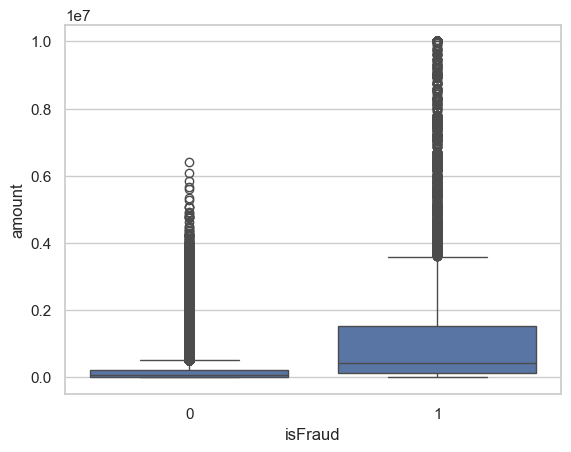

In [11]:
# Relation entre amount et isFraud : Visualiser comment les fraudes sont réparties en fonction du montant des transactions.
sns.boxplot(x='isFraud', y='amount', data=df)

"Le Montant des transactions" peut influencer la potentielle fraude par le fait que les montants soient très importants

<Figure size 1000x600 with 0 Axes>

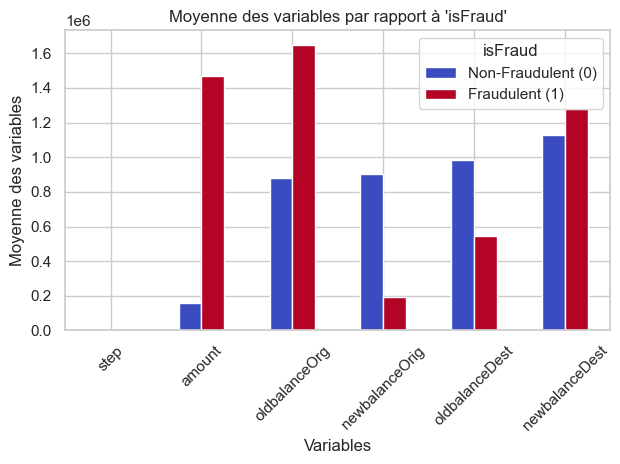

In [12]:
# Sélectionner les variables pertinentes pour l'analyse de la corrélation
# On suppose ici que les variables pertinentes sont celles numériques
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

# Groupby par 'isFraud' et calcul des moyennes pour chaque feature
grouped_df = df[features].groupby('isFraud').mean()

# Affichage des résultats sous forme de barplot
plt.figure(figsize=(10, 6))
grouped_df.T.plot(kind='bar', colormap='coolwarm')
plt.title("Moyenne des variables par rapport à 'isFraud'")
plt.ylabel("Moyenne des variables")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.legend(title='isFraud', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.tight_layout()
plt.show()

Les transactions frauduleuses ont tendance à impliquer des montants plus élevés.

Elles commencent avec des soldes plus élevés pour l'expéditeur mais se terminent avec des soldes plus bas.

Le solde du destinataire augmente de manière significative après une transaction frauduleuse, ce qui suggère que les fonds sont déplacés vers un compte cible.

Cette analyse pourrait être utilisée pour identifier des schémas typiques de fraude et améliorer les modèles de détection des fraudes.

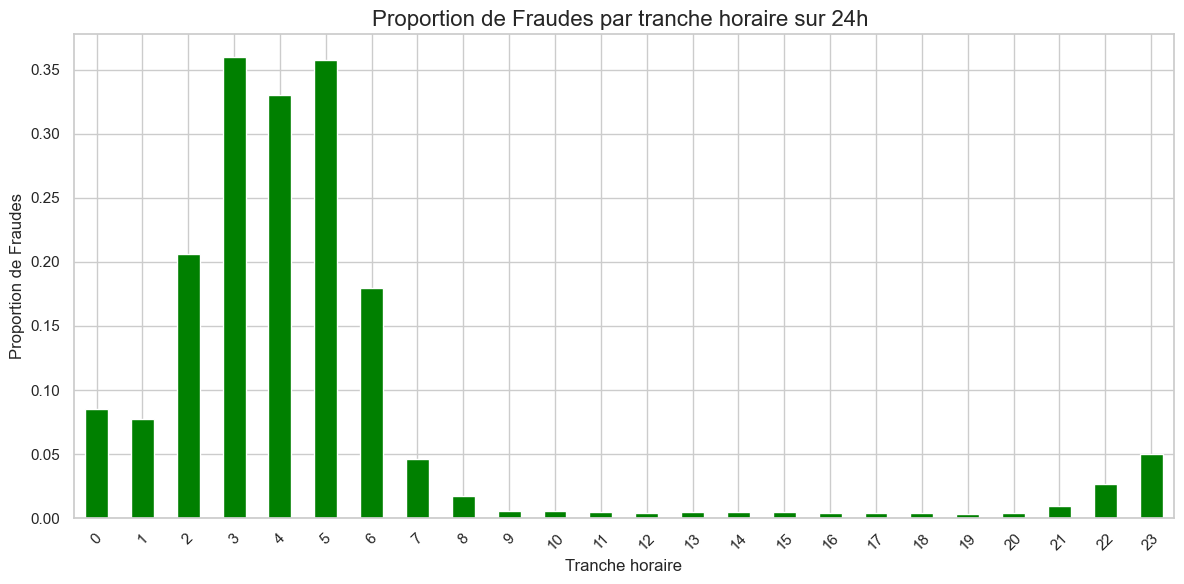

In [13]:
# Étape 1 : Convertir les steps en heures (modulo 24)
df['hour'] = df['step'] % 24

# Étape 2 : Filtrer les transactions frauduleuses
df_fraud = df[df['isFraud'] == 1]

# Étape 3 : Calculer la proportion de fraudes par tranche horaire de transaction
fraud_proportion_by_type = df.groupby('hour')['isFraud'].mean()

# Étape 4 : Tracer la proportion de fraudes par type de transaction
plt.figure(figsize=(12, 6))  # Définir la taille de la figure
fraud_proportion_by_type.plot(kind='bar', color='green')  # Tracer un graphique à barres
plt.title("Proportion de Fraudes par tranche horaire sur 24h ", fontsize=16)  # Titre du graphique
plt.xlabel("Tranche horaire", fontsize=12)  # Étiquette de l'axe des x
plt.ylabel("Proportion de Fraudes", fontsize=12)  # Étiquette de l'axe des y
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x
plt.tight_layout()  # Ajuster la mise en page
plt.show()  # Afficher le graphique

On remarque qu'il y a un lien entre les fraudes et la temporalité (que nous n'exploiterons pas dans notre projet)

         transactionId  step      type      amount     nameOrig  \
0                    0     1   PAYMENT     9839.64  C1231006815   
1                    1     1   PAYMENT     1864.28  C1666544295   
2                    2     1  TRANSFER      181.00  C1305486145   
3                    3     1  CASH_OUT      181.00   C840083671   
4                    4     1   PAYMENT    11668.14  C2048537720   
...                ...   ...       ...         ...          ...   
1008208        6362615   743  CASH_OUT   339682.13   C786484425   
1008209        6362616   743  TRANSFER  6311409.28  C1529008245   
1008210        6362617   743  CASH_OUT  6311409.28  C1162922333   
1008211        6362618   743  TRANSFER   850002.52  C1685995037   
1008212        6362619   743  CASH_OUT   850002.52  C1280323807   

         oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  \
0            170136.00       160296.36  M1979787155            0.00   
1             21249.00        19384.72  M2044282225  

C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_9784\4060253455.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='type', y='isFraud', data=fraudes_par_type, palette='viridis')


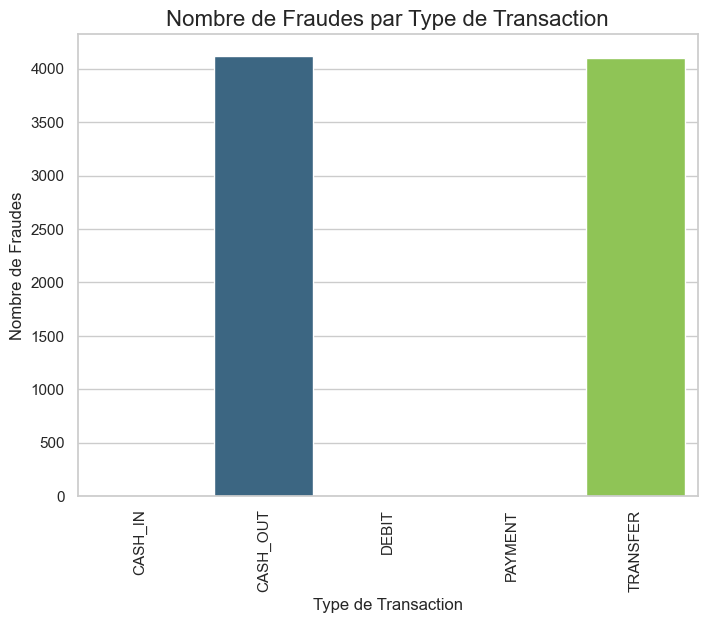

C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_9784\4060253455.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraudes_par_montant = df.groupby('montant_cat')['isFraud'].sum().reset_index()
C:\Users\laetitia.monnier\AppData\Local\Temp\ipykernel_9784\4060253455.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='montant_cat', y='isFraud', data=fraudes_par_montant, palette='viridis')


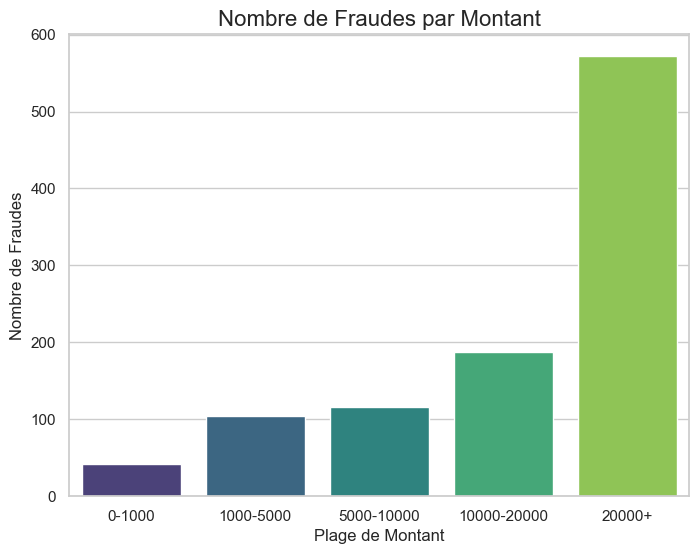

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
le = LabelEncoder()

# Encoder la colonne 'type'
df['type_encoded'] = le.fit_transform(df['type'])

# Afficher le résultat
print(df)

# Compter le nombre de fraudes (1) pour chaque type de transaction
fraudes_par_type = df.groupby('type')['isFraud'].sum().reset_index()

# Création du barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='isFraud', data=fraudes_par_type, palette='viridis')

# Ajouter un titre et labels
plt.title('Nombre de Fraudes par Type de Transaction', fontsize=16)
plt.xlabel('Type de Transaction', fontsize=12)
plt.ylabel('Nombre de Fraudes', fontsize=12)
plt.xticks(rotation=90)  # Faire pivoter les labels de l'axe x si nécessaire

# Afficher le graphique
plt.show()

# Diviser les montants en catégories (par exemple, tranches de 1000)
df['montant_cat'] = pd.cut(df['amount'], bins=[0, 1000, 5000, 10000, 20000, 50000], labels=["0-1000", "1000-5000", "5000-10000", "10000-20000", "20000+"])

# Compter le nombre de fraudes par tranche de montant
fraudes_par_montant = df.groupby('montant_cat')['isFraud'].sum().reset_index()

# Créer le barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='montant_cat', y='isFraud', data=fraudes_par_montant, palette='viridis')

# Ajouter des titres et labels
plt.title('Nombre de Fraudes par Montant', fontsize=16)
plt.xlabel('Plage de Montant', fontsize=12)
plt.ylabel('Nombre de Fraudes', fontsize=12)

# Afficher le graphique
plt.show()

On remarque qu'il y a fraudes uniquement dans les transactions impliquant "cash_out", "transfer"

On remarque que les fraudes apparaissent plus souvent sur les gros montants